In [ ]:
# default_exp examples.samplings

# Example samplings

> Collection of example quantum protocol samplings.

In [ ]:
# hide
from nbdev.showdoc import *

In [ ]:
# export
from qsam.examples.protocols import *
from qsam.sampler.direct_sampler import DirectSampler
from qsam.sampler.subset_sampler import SubsetSampler
from qsam.simulators.chp import ChpSimulator
import qsam.callbacks as cb
from qsam.fault_generators import Depolarizing
from qsam.sampler.subset_sampler import random_sel

import numpy as np

## Sampling of GHZ repeat until success protocol

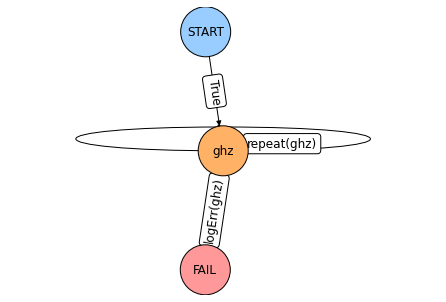

In [ ]:
ghz3.draw()

Total:   0%|          | 0/300 [00:00<?, ?it/s]

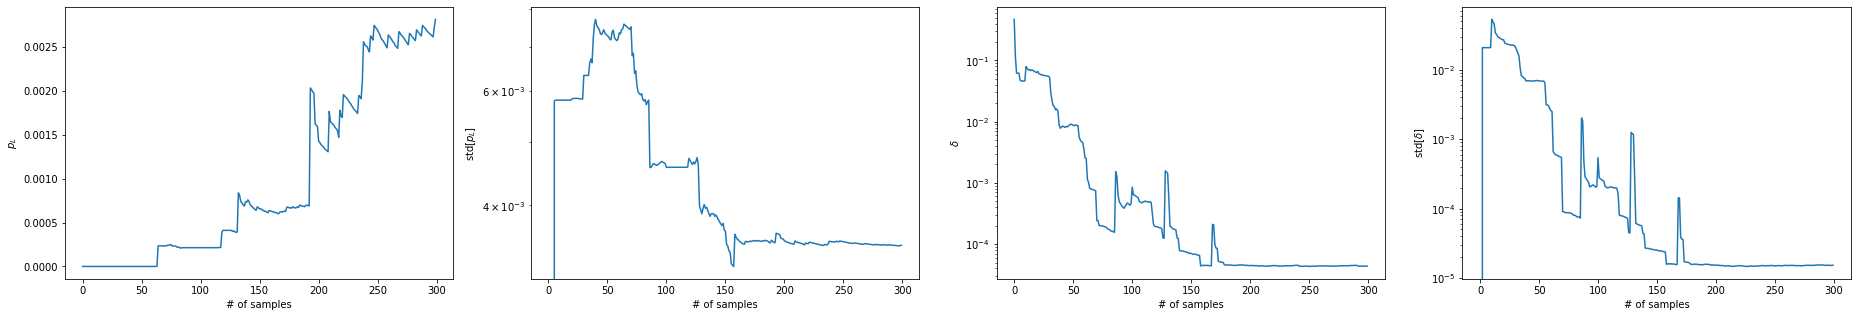

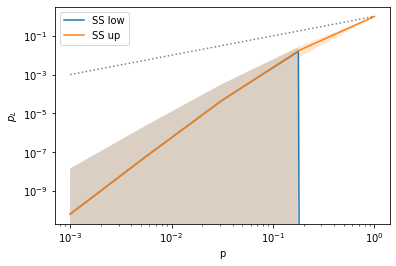

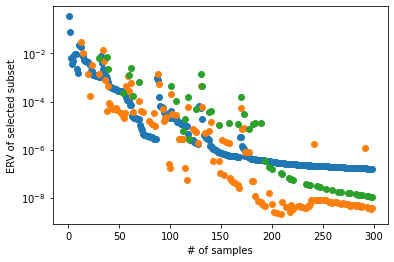

In [ ]:
#slow

sample_range = np.logspace(-3,0,5)
err_params = {'p': sample_range}

fault_gen = Depolarizing(err_params)
sam = SubsetSampler(ghz3, ChpSimulator, fault_gen, p_max=0.1)

callbacks = [
    cb.StatsPerSample(),
    cb.PlotStats(), 
    cb.ErvPerSample()
]
sam.run(300, callbacks=callbacks)
sam.tree.draw()
# print(sam.tree)

In [ ]:
sam.tree.delta, sam.tree.delta2, sam.tree.delta >= sam.tree.delta2

(4.375876840214594e-05, 4.3758768402346604e-05, False)

In [ ]:
Aws_pmax = sam.tree.constants
from qsam.sampler.subset_sampler import protocol_subset_occurence
Aws = protocol_subset_occurence(sam.fault_gen.partitions, sam.w_vecs, sam.fault_gen.p_phy)
sam.tree.constants = Aws
delta2 = sam.tree.delta2
delta = sam.tree.delta
sam.tree.constants = Aws_pmax

delta, delta2

(array([2.86448834e-18, 1.61509475e-13, 2.36388924e-08, 1.27876773e-03,
        1.00000000e+00]),
 array([3.33066907e-16, 1.61204383e-13, 2.36388921e-08, 1.27876773e-03,
        1.00000000e+00]))

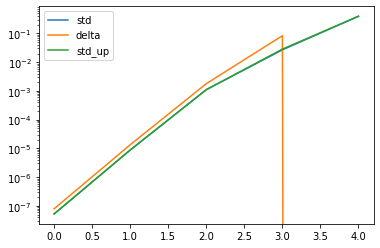

In [ ]:

import matplotlib.pyplot as plt

stats = sam.stats()
plt.plot(stats[1], label='std')
plt.plot(stats[2], label='delta')
plt.plot(stats[3], label='std_up')
plt.yscale('log')
plt.legend()

Total:   0%|          | 0/5 [00:00<?, ?it/s]

p_phy=1.00E-03:   0%|          | 0/10000 [00:00<?, ?it/s]

p_phy=5.62E-03:   0%|          | 0/10000 [00:00<?, ?it/s]

p_phy=3.16E-02:   0%|          | 0/10000 [00:00<?, ?it/s]

p_phy=1.78E-01:   0%|          | 0/10000 [00:00<?, ?it/s]

p_phy=1.00E+00:   0%|          | 0/10000 [00:00<?, ?it/s]

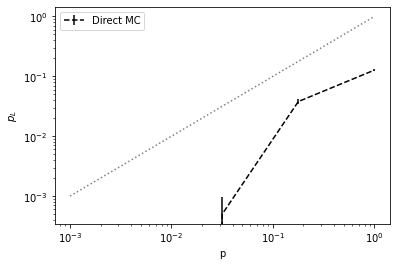

In [ ]:
#slow

sample_range = np.logspace(-3,0,5)
err_params = {'p': sample_range}
fault_gen = Depolarizing(err_params)

mc_sam = DirectSampler(ghz3, ChpSimulator, fault_gen)
callbacks = [
    cb.PlotStats()
]

mc_sam.run(n_samples=10000, callbacks=callbacks)

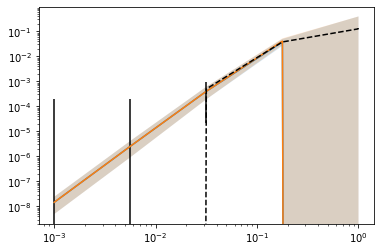

In [ ]:
#slow
import matplotlib.pyplot as plt

p_L, std = mc_sam.stats()
p_L_low, ss_std_low, p_L_up, ss_std_up = sam.stats()

plt.errorbar(sample_range, p_L, fmt='--', c="black", yerr=std, label="Direct MC")

plt.plot(sample_range, p_L_low, label='SS low')
plt.fill_between(sample_range, p_L_low-ss_std_low, p_L_low+ss_std_low, alpha=0.2)
plt.plot(sample_range, p_L_up, label='SS low')
plt.fill_between(sample_range, p_L_up-ss_std_up, p_L_up+ss_std_up, alpha=0.2)
plt.xscale('log')
plt.yscale('log')

## Sampling of GHZ stabilizer measurement protocol

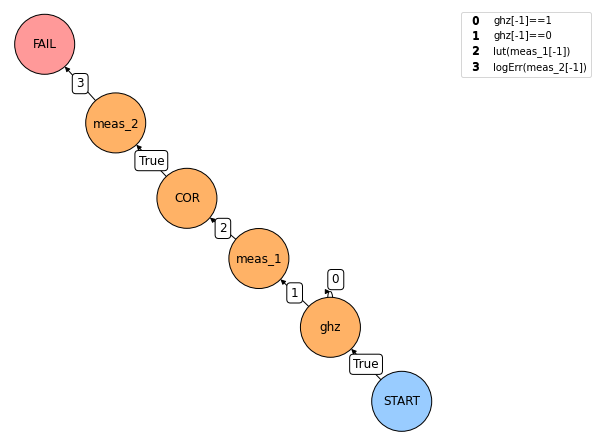

In [ ]:
ghz_stab.draw(figsize=(6,6), edge_legend=True)

# PROBLEMS WITH ERV:
* Stop exploring (0,) branch after first few samples yield no logical fail in this case
* If fails are found in a branch, we excessively sample in this subtree, not in others!
-> leave out a complete subset subtree is bad: over/underestimating the failure rate.

Total:   0%|          | 0/300 [00:00<?, ?it/s]

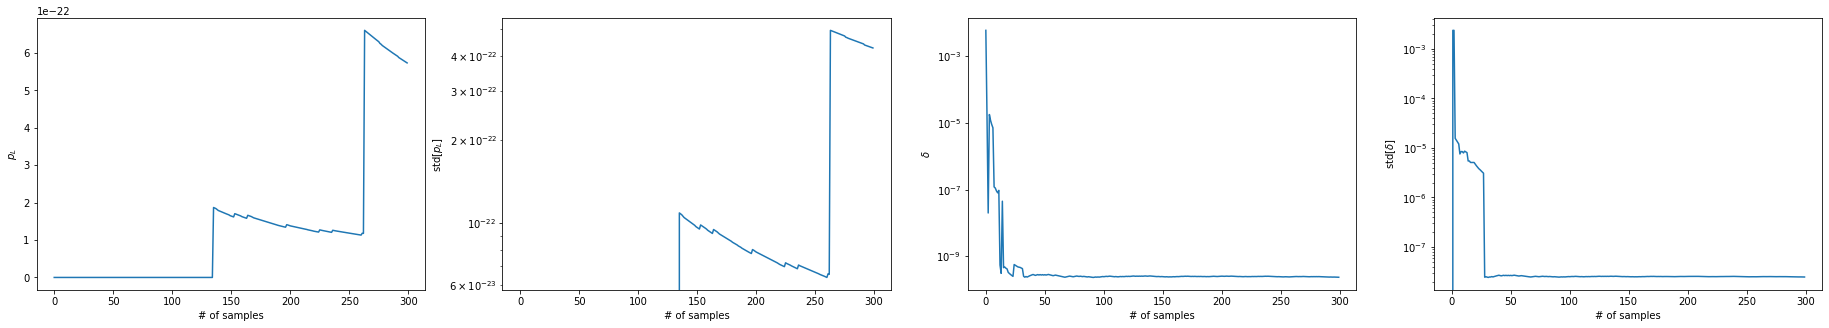

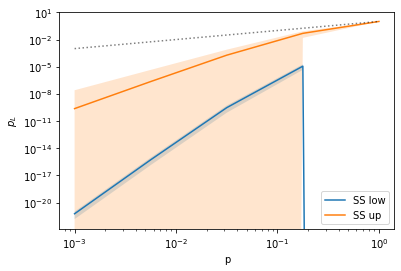

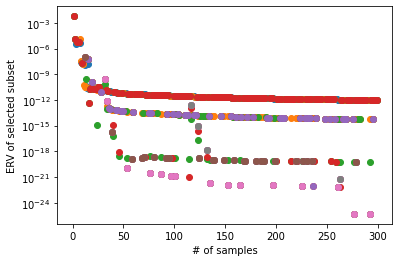

In [ ]:
#slow

sample_range = np.logspace(-3,0,5)
err_params = {'p': sample_range}

fault_gen = Depolarizing(err_params)
sam = SubsetSampler(ghz_stab, ChpSimulator, fault_gen, p_max=0.001)

callbacks = [
    cb.StatsPerSample(),
    cb.PlotStats(), 
    cb.ErvPerSample()
]
sam.run(300, callbacks=callbacks)
sam.tree.draw()

In [ ]:
sam.tree.delta < sam.tree.delta2, sam.tree.delta, sam.tree.delta2

(False, 2.3594433323434513e-10, 2.359442641264309e-10)

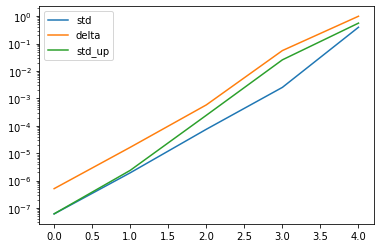

In [ ]:

import matplotlib.pyplot as plt

stats = sam.stats()
plt.plot(stats[1], label='std')
plt.plot(stats[2], label='delta')
plt.plot(stats[3], label='std_up')
plt.yscale('log')
plt.legend()

Total:   0%|          | 0/5 [00:00<?, ?it/s]

p_phy=1.00E-03:   0%|          | 0/10000 [00:00<?, ?it/s]

p_phy=5.62E-03:   0%|          | 0/10000 [00:00<?, ?it/s]

p_phy=3.16E-02:   0%|          | 0/10000 [00:00<?, ?it/s]

p_phy=1.78E-01:   0%|          | 0/10000 [00:00<?, ?it/s]

p_phy=1.00E+00:   0%|          | 0/10000 [00:00<?, ?it/s]

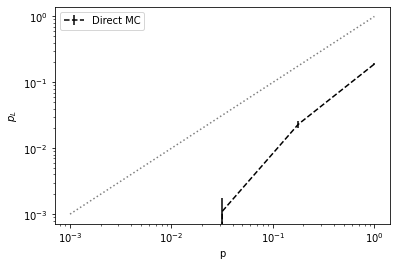

In [ ]:
#slow

sample_range = np.logspace(-3,0,5)
err_params = {'p': sample_range}
fault_gen = Depolarizing(err_params)

mc_sam = DirectSampler(ghz_stab, ChpSimulator, fault_gen)
callbacks = [
    cb.PlotStats()
]

mc_sam.run(n_samples=10000, callbacks=callbacks)

In [ ]:
mc_sam.tree.draw(scale_percent=50)

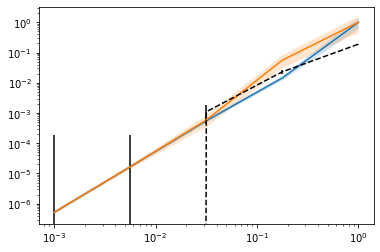

In [ ]:
#slow
import matplotlib.pyplot as plt

p_L, std = mc_sam.stats()
p_L_low, ss_std_low, p_L_up, ss_std_up = sam.stats()

plt.errorbar(sample_range, p_L, fmt='--', c="black", yerr=std, label="Direct MC")

plt.plot(sample_range, p_L_low, label='SS low')
plt.fill_between(sample_range, p_L_low-ss_std_low, p_L_low+ss_std_low, alpha=0.2)
plt.plot(sample_range, p_L_up, label='SS low')
plt.fill_between(sample_range, p_L_up-ss_std_up, p_L_up+ss_std_up, alpha=0.2)
plt.xscale('log')
plt.yscale('log')

## Fault-tolerant color code sampling

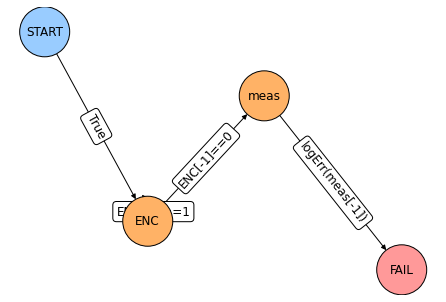

In [ ]:
ftsteane.draw()

Total:   0%|          | 0/300 [00:00<?, ?it/s]

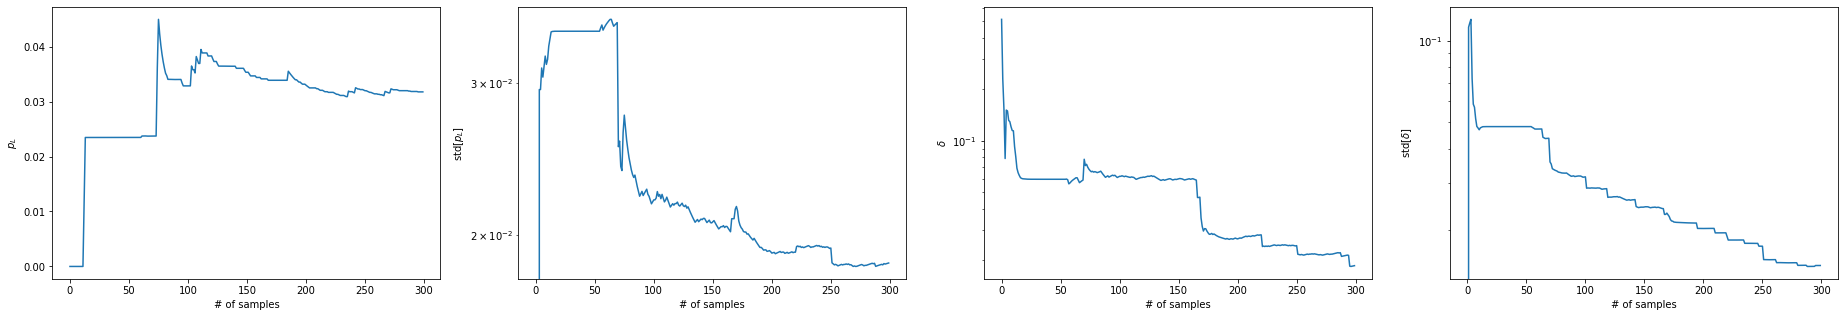

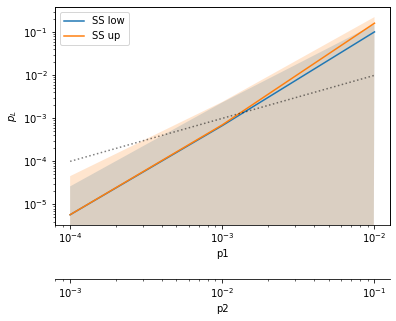

In [ ]:
#slow

# sample_range = np.logspace(-3,0,5)
sample_range = np.logspace(-1,1,3)
err_params = {'p1': 0.001*sample_range, 'p2': 0.01*sample_range}
# err_params = {'p': sample_range}


fault_gen = Depolarizing(err_params)
sam = SubsetSampler(ftsteane, ChpSimulator, fault_gen, p_max=(0.05,0.05))


callbacks = [
    # cb.StatsPerSample(),
    # cb.PlotStats(), 
]
sam.run(1, callbacks=callbacks)
sam.tree.draw()
# print(sam.tree)
sam.delta, sam.

In [ ]:
sam.tree.delta < sam.tree.delta2, sam.tree.delta, sam.tree.delta2

(False, 0.01859985183005703, 0.018599851830056968)

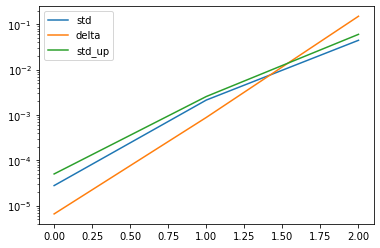

In [ ]:
import matplotlib.pyplot as plt

stats = sam.stats()
plt.plot(stats[1], label='std')
plt.plot(stats[2], label='delta')
plt.plot(stats[3], label='std_up')
plt.yscale('log')
plt.legend()

Total:   0%|          | 0/3 [00:00<?, ?it/s]

p_phy=1.00E-04,1.00E-03:   0%|          | 0/10000 [00:00<?, ?it/s]

p_phy=1.00E-03,1.00E-02:   0%|          | 0/10000 [00:00<?, ?it/s]

p_phy=1.00E-02,1.00E-01:   0%|          | 0/10000 [00:00<?, ?it/s]

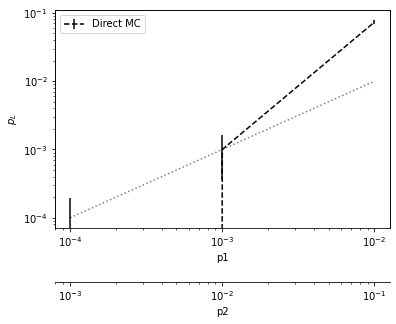

In [ ]:
#slow

sample_range = np.logspace(-1,1,3)
err_params = {'p1': 0.001*sample_range, 'p2': 0.01*sample_range}

fault_gen = Depolarizing(err_params)

mc_sam = DirectSampler(ftsteane, ChpSimulator, fault_gen)
callbacks = [
    cb.PlotStats()
]

mc_sam.run(n_samples=10000, callbacks=callbacks)

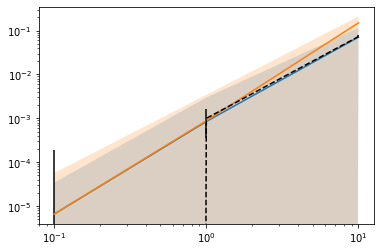

In [ ]:
#slow

import matplotlib.pyplot as plt

p_L, std = mc_sam.stats()
p_L_low, ss_std_low, p_L_up, ss_std_up = sam.stats()

plt.errorbar(sample_range, p_L, fmt='--', c="black", yerr=std, label="Direct MC")

plt.plot(sample_range, p_L_low, label='SS low')
plt.fill_between(sample_range, p_L_low-ss_std_low, p_L_low+ss_std_low, alpha=0.2)
plt.plot(sample_range, p_L_up, label='SS low')
plt.fill_between(sample_range, p_L_up-ss_std_up, p_L_up+ss_std_up, alpha=0.2)
plt.xscale('log')
plt.yscale('log')

## Deterministic Steane logical 0-state preparation protocol sampling

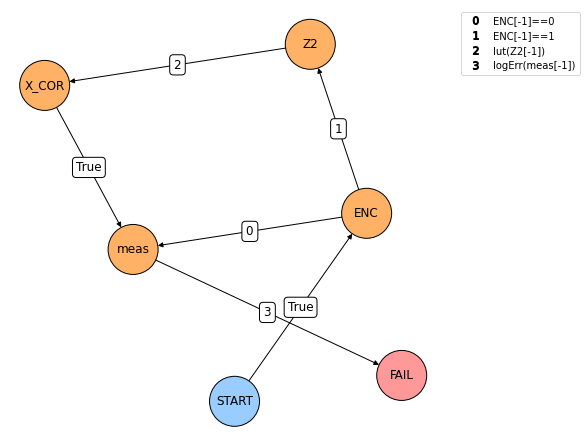

In [ ]:
steane0.draw(figsize=(6,6), edge_legend=True)

Total:   0%|          | 0/100 [00:00<?, ?it/s]

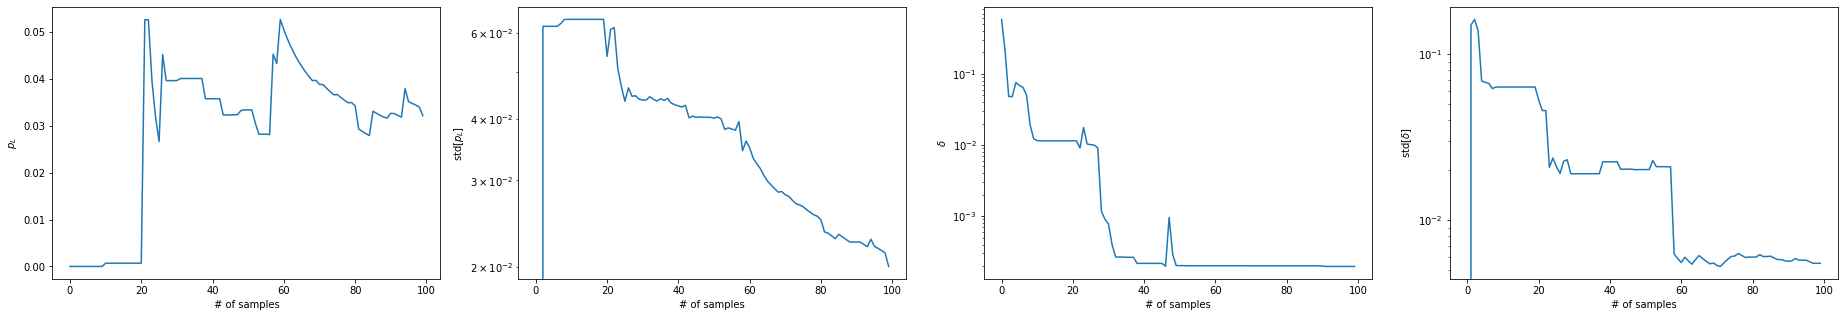

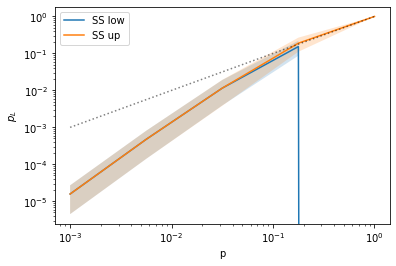

In [ ]:
#slow

# sample_range = np.logspace(-1,1,3)
# err_params = {'p1': 0.001*sample_range, 'p2': 0.01*sample_range}
sample_range = np.logspace(-3,0,5)
err_params = {'p': sample_range}


fault_gen = Depolarizing(err_params)
sam = SubsetSampler(steane0, ChpSimulator, fault_gen, p_max=0.06)


callbacks = [
    cb.StatsPerSample(),
    cb.PlotStats(), 
]
sam.run(100, callbacks=callbacks)
sam.tree.draw()
# print(sam.tree)

In [ ]:
sam.tree.delta, sam.tree.delta2

(0.0001969925262476353, 0.00019699252624738595)

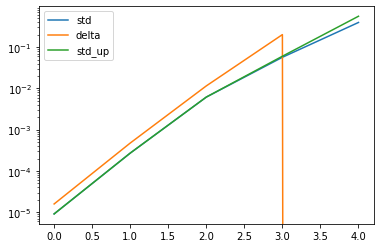

In [ ]:
import matplotlib.pyplot as plt

stats = sam.stats()
plt.plot(stats[1], label='std')
plt.plot(stats[2], label='delta')
plt.plot(stats[3], label='std_up')
plt.yscale('log')
plt.legend()

Total:   0%|          | 0/5 [00:00<?, ?it/s]

p_phy=1.00E-03:   0%|          | 0/10000 [00:00<?, ?it/s]

p_phy=5.62E-03:   0%|          | 0/10000 [00:00<?, ?it/s]

p_phy=3.16E-02:   0%|          | 0/10000 [00:00<?, ?it/s]

p_phy=1.78E-01:   0%|          | 0/10000 [00:00<?, ?it/s]

p_phy=1.00E+00:   0%|          | 0/10000 [00:00<?, ?it/s]

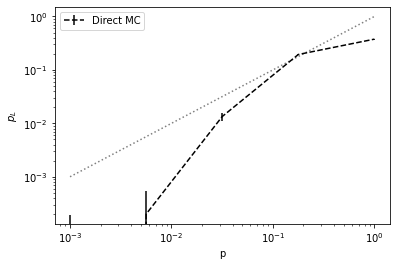

In [ ]:
#slow

sample_range = np.logspace(-3,0,5)
err_params = {'p': sample_range}

fault_gen = Depolarizing(err_params)

mc_sam = DirectSampler(steane0, ChpSimulator, fault_gen)
callbacks = [
    cb.PlotStats()
]

mc_sam.run(n_samples=10000, callbacks=callbacks)

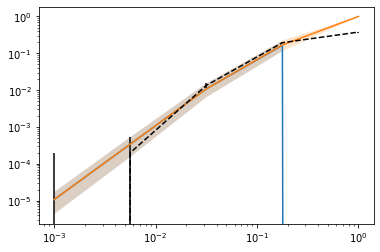

In [ ]:
#slow

import matplotlib.pyplot as plt

p_L, std = mc_sam.stats()
p_L_low, ss_std_low, p_L_up, ss_std_up = sam.stats()

plt.errorbar(sample_range, p_L, fmt='--', c="black", yerr=std, label="Direct MC")

plt.plot(sample_range, p_L_low, label='SS low')
plt.fill_between(sample_range, p_L_low-ss_std_low, p_L_low+ss_std_low, alpha=0.2)
plt.plot(sample_range, p_L_up, label='SS low')
plt.fill_between(sample_range, p_L_up-ss_std_up, p_L_up+ss_std_up, alpha=0.2)
plt.xscale('log')
plt.yscale('log')

## Flag stabilizer protocol sampling

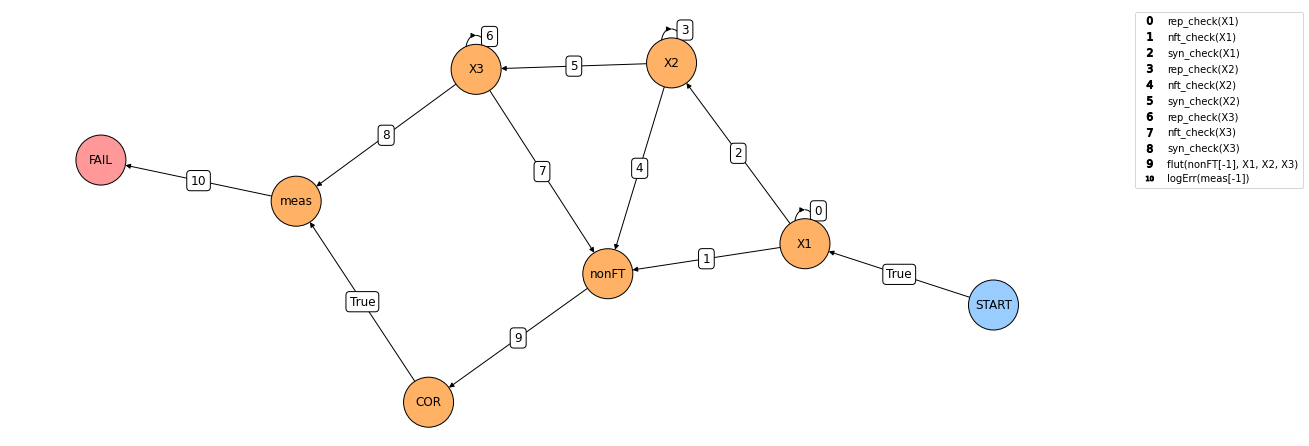

In [ ]:
flagstab.draw(figsize=(15,6), edge_legend=True)

Total:   0%|          | 0/100 [00:00<?, ?it/s]

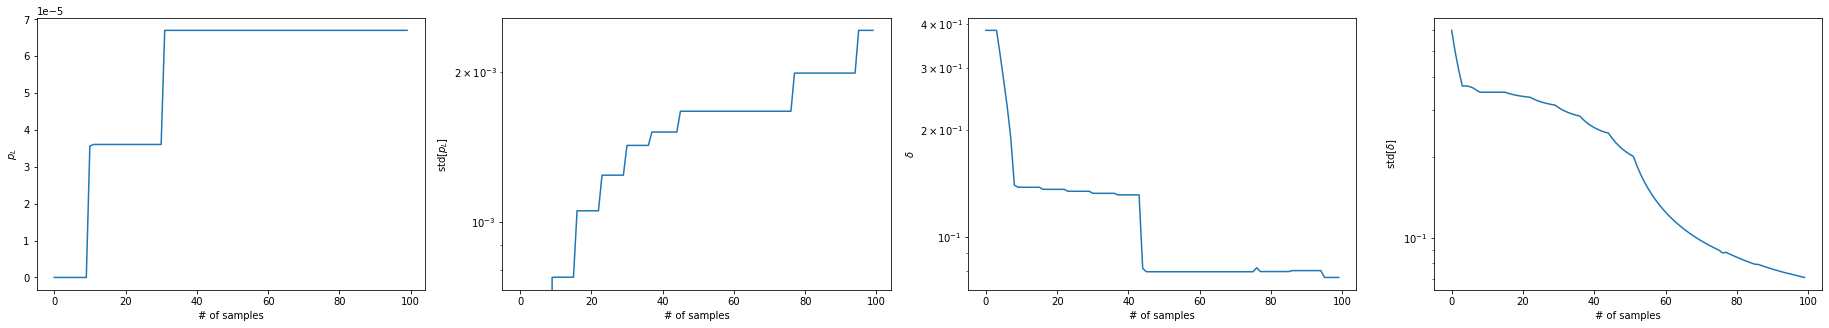

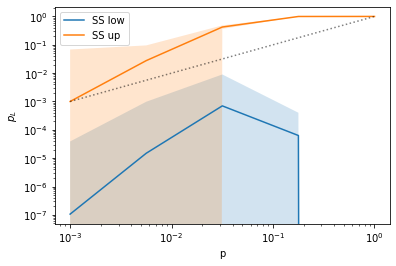

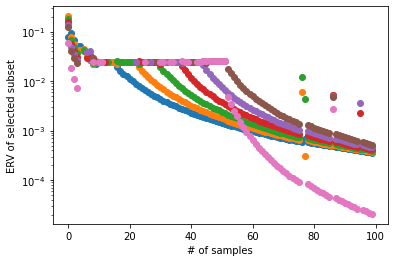

In [ ]:
#slow

sample_range = np.logspace(-3,0,5)
err_params = {'p': sample_range}

fault_gen = Depolarizing(err_params)
sam = SubsetSampler(flagstab, ChpSimulator, fault_gen, p_max=0.01)

callbacks = [
    cb.StatsPerSample(),
    cb.PlotStats(), 
    cb.ErvPerSample()
]
sam.run(100, callbacks=callbacks)
sam.tree.draw()

In [ ]:
sam.stats()
sam.tree.constants

{'b15091f8d9': array([9.22744694e-01, 7.45652278e-02, 2.63614442e-03, 5.32554428e-05,
        6.72417207e-07, 5.43367440e-09, 2.74428000e-11, 7.92000000e-14,
        1.00000000e-16]),
 '31c18b1e32': array([9.22744694e-01, 7.45652278e-02, 2.63614442e-03, 5.32554428e-05,
        6.72417207e-07, 5.43367440e-09, 2.74428000e-11, 7.92000000e-14,
        1.00000000e-16]),
 '7b9883d9cb': array([9.22744694e-01, 7.45652278e-02, 2.63614442e-03, 5.32554428e-05,
        6.72417207e-07, 5.43367440e-09, 2.74428000e-11, 7.92000000e-14,
        1.00000000e-16]),
 'ebbad52ada': array([7.39700373e-01, 2.24151628e-01, 3.28302890e-02, 3.09511142e-03,
        2.11030324e-04, 1.10844211e-05, 4.66516038e-07, 1.61563996e-08,
        4.69188372e-10, 1.15848981e-11, 2.45740262e-13, 4.51313613e-15,
        7.21797865e-17, 1.00950750e-18, 1.23821267e-20, 1.33410119e-22,
        1.26335340e-24, 1.05091786e-26, 7.66662861e-29, 4.89099114e-31,
        2.71721730e-33, 1.30698283e-35, 5.40075549e-38, 1.89749864e-40,
  

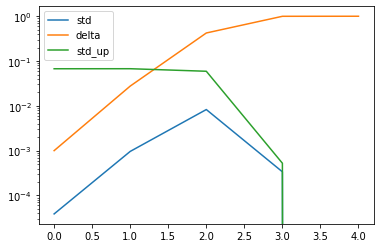

In [ ]:
import matplotlib.pyplot as plt

stats = sam.stats()
plt.plot(stats[1], label='std')
plt.plot(stats[2], label='delta')
plt.plot(stats[3], label='std_up')
plt.yscale('log')
plt.legend()

In [ ]:
sam.protocol.fault_tolerant

True

Total:   0%|          | 0/5 [00:00<?, ?it/s]

p_phy=1.00E-03:   0%|          | 0/5000 [00:00<?, ?it/s]

p_phy=5.62E-03:   0%|          | 0/5000 [00:00<?, ?it/s]

p_phy=3.16E-02:   0%|          | 0/5000 [00:00<?, ?it/s]

p_phy=1.78E-01:   0%|          | 0/5000 [00:00<?, ?it/s]

p_phy=1.00E+00:   0%|          | 0/5000 [00:00<?, ?it/s]

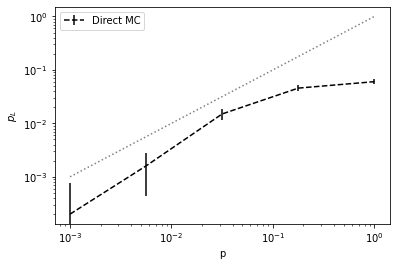

In [ ]:
#slow

sample_range = np.logspace(-3,0,5)
err_params = {'p': sample_range}

fault_gen = Depolarizing(err_params)

mc_sam = DirectSampler(flagstab, ChpSimulator, fault_gen)
callbacks = [
    cb.PlotStats()
]

mc_sam.run(n_samples=5000, callbacks=callbacks)

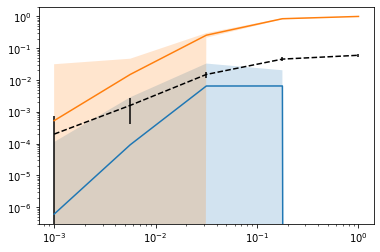

In [ ]:
#slow

import matplotlib.pyplot as plt

p_L, std = mc_sam.stats()
p_L_low, ss_std_low, p_L_up, ss_std_up = sam.stats()

plt.errorbar(sample_range, p_L, fmt='--', c="black", yerr=std, label="Direct MC")

plt.plot(sample_range, p_L_low, label='SS low')
plt.fill_between(sample_range, p_L_low-ss_std_low, p_L_low+ss_std_low, alpha=0.2)
plt.plot(sample_range, p_L_up, label='SS low')
plt.fill_between(sample_range, p_L_up-ss_std_up, p_L_up+ss_std_up, alpha=0.2)
plt.xscale('log')
plt.yscale('log')

# Problems with var delta
* Here, var_delta does not scale quadratically (for long paths)
-> Some path with (0,)'s contributes here which should not. -> How to treat long paths for var_delta?
* How to calculate delta_var in this example? Should all vars along the path be 0? What if at some point a sub-branch is opened from one of the (0,)'s which leads to a logical failure? Is the var of this new sub-branch not 0 but the one to the (0,)-subbranch 0? How can we derive this mathematically?

In [ ]:
sample_range = np.logspace(-3,0,5)
err_params = {'p': sample_range}

fault_gen = Depolarizing(err_params)
sam = SubsetSampler(flagstab, ChpSimulator, fault_gen, p_max=0.01)

callbacks = [
    # cb.StatsPerSample(),
    # cb.PlotStats(), 
]
sam.run(5, callbacks=callbacks)

# import matplotlib.pyplot as plt

# stats = sam.stats()
# plt.plot(stats[1], label='std')
# plt.plot(stats[2], label='delta')
# plt.plot(stats[3], label='std_up')
# plt.yscale('log')
# plt.legend()

# print(sam.stats())
print(sam.tree.norm_variance, sam.tree.variance)
sam.tree.draw(scale_percent=20)

Total:   0%|          | 0/5 [00:00<?, ?it/s]

0.137993510142733 0.0
